In [1]:
# Run this cell if you use Google Colab
# from google.colab import drive
# drive.mount('/content/drive/')

In [20]:
## Install Library
# !pip install librosa soundfile numpy sklearn pyaudio
# !pip install soundfile
# !pip install seaborn
# !pip install h5py

###Import Modul

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
import soundfile as sf
import librosa
import librosa.display
import warnings
import keras
from IPython.display import Audio
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")


###Load Dataset

#### Run this cell if you use Google Colab and link to Drive

In [3]:
# 
#file_pattern = '/content/drive/My Drive/BangkitAcademy/*.wav'

# Menggunakan glob.glob() untuk mencocokkan pola path dengan nama file
#file_list = glob.glob(file_pattern)

#dataset = []

# Memuat setiap file audio dan menyimpannya dalam dataset
#for file_path in file_list:
    # Memuat file audio menggunakan soundfile
#    audio, sample_rate = sf.read(file_path)
    
    # Menambahkan audio ke dalam dataset
#    dataset.append((audio, sample_rate, file_path))

# Menampilkan informasi dataset
#print("Jumlah file audio:", len(dataset))

In [3]:
# file_list = glob.glob('./dataverse_files/*.wav')

# emotions = []
# paths = []

# for file in file_list:
#     # Menyimpan path file
#     paths.append(file)
#     # Menyimpan emosi file
#     part = os.path.basename(file).split('_')
#     emotions.append(part[2].split('.')[0])

# # Membuat dataframe dari daftar emosi dan path file
# emotion_df = pd.DataFrame(emotions, columns=['Emotions'])
# path_df = pd.DataFrame(paths, columns=['Path'])

# data_df = pd.concat([emotion_df, path_df], axis=1)

# e_dict = {'happy': 'happy', 'sad': 'sad', 'angry': 'angry', 'neutral': 'neutral', 'disgust': 'disgust'}
# data_df['Emotions'] = data_df['Emotions'].map(e_dict)

# del emotion_df
# del path_df

# data_df.head()

,Emotions,Path
0,angry,./dataverse_files\OAF_back_angry.wav
1,disgust,./dataverse_files\OAF_back_disgust.wav
2,NaN,./dataverse_files\OAF_back_fear.wav
3,happy,./dataverse_files\OAF_back_happy.wav
4,neutral,./dataverse_files\OAF_back_neutral.wav


#### Run this cell if you use local

In [2]:
raw_df = []

In [3]:
for folder in os.listdir('../../Capstone_test/dats/'):
  for file in os.listdir(os.path.join('../../Capstone_test/dats', folder)):
    raw_df.append([os.path.join('../../Capstone_test/dats', folder, file), folder])

In [4]:
raw_df

[['../../Capstone_test/dats\\angry\\OAF_back_angry.wav', 'angry'],
 ['../../Capstone_test/dats\\angry\\OAF_bar_angry.wav', 'angry'],
 ['../../Capstone_test/dats\\angry\\OAF_base_angry.wav', 'angry'],
 ['../../Capstone_test/dats\\angry\\OAF_bath_angry.wav', 'angry'],
 ['../../Capstone_test/dats\\angry\\OAF_bean_angry.wav', 'angry'],
 ['../../Capstone_test/dats\\angry\\OAF_beg_angry.wav', 'angry'],
 ['../../Capstone_test/dats\\angry\\OAF_bite_angry.wav', 'angry'],
 ['../../Capstone_test/dats\\angry\\OAF_boat_angry.wav', 'angry'],
 ['../../Capstone_test/dats\\angry\\OAF_bone_angry.wav', 'angry'],
 ['../../Capstone_test/dats\\angry\\OAF_book_angry.wav', 'angry'],
 ['../../Capstone_test/dats\\angry\\OAF_bought_angry.wav', 'angry'],
 ['../../Capstone_test/dats\\angry\\OAF_burn_angry.wav', 'angry'],
 ['../../Capstone_test/dats\\angry\\OAF_cab_angry.wav', 'angry'],
 ['../../Capstone_test/dats\\angry\\OAF_calm_angry.wav', 'angry'],
 ['../../Capstone_test/dats\\angry\\OAF_came_angry.wav', 'angry

In [5]:
data_df = pd.DataFrame(raw_df, columns =['Path', 'Emotions'])

In [6]:
data_df['Emotions'].value_counts()

Emotions
angry      400
disgust    400
happy      400
sad        400
Name: count, dtype: int64

In [7]:
data_df.to_csv("../../Capstone_test/data_df.csv",index=False)
data_df.head

<bound method NDFrame.head of                                                    Path Emotions
0     ../../Capstone_test/dats\angry\OAF_back_angry.wav    angry
1      ../../Capstone_test/dats\angry\OAF_bar_angry.wav    angry
2     ../../Capstone_test/dats\angry\OAF_base_angry.wav    angry
3     ../../Capstone_test/dats\angry\OAF_bath_angry.wav    angry
4     ../../Capstone_test/dats\angry\OAF_bean_angry.wav    angry
...                                                 ...      ...
1595     ../../Capstone_test/dats\sad\YAF_witch_sad.wav      sad
1596     ../../Capstone_test/dats\sad\YAF_yearn_sad.wav      sad
1597       ../../Capstone_test/dats\sad\YAF_yes_sad.wav      sad
1598     ../../Capstone_test/dats\sad\YAF_young_sad.wav      sad
1599     ../../Capstone_test/dats\sad\YAF_youth_sad.wav      sad

[1600 rows x 2 columns]>

In [8]:
data_df.reset_index(drop=True, inplace=True)

In [9]:
data_df['Emotions'].value_counts()

Emotions
angry      400
disgust    400
happy      400
sad        400
Name: count, dtype: int64

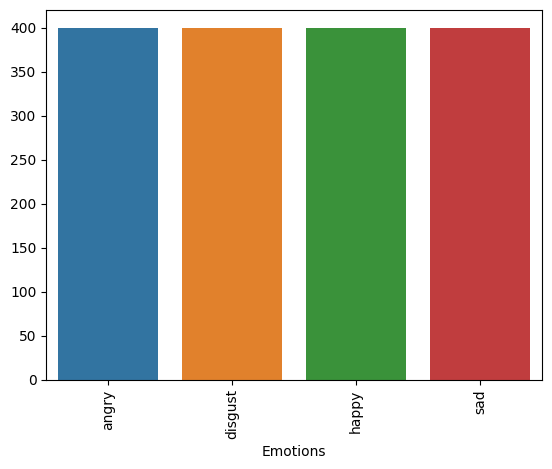

In [10]:
# EDA - Plot histogram
emotion_counts = data_df["Emotions"].value_counts()
plt.xticks(rotation='vertical')
sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.show()

### Waveplot & Spectogram

Waveplot : menunjukkan bagaimana amplitudo suara berubah seiring waktu. 

Spektrogram : representasi visual dari spektrum frekuensi suara seiring waktu. 

In [11]:
def waveplot(dat, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(dat, sr=sr)
    plt.show()

def spectogram(dat, sr, emotion):
    x = librosa.stft(dat)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [13]:
emot = ['happy', 'sad', 'angry', 'disgust']

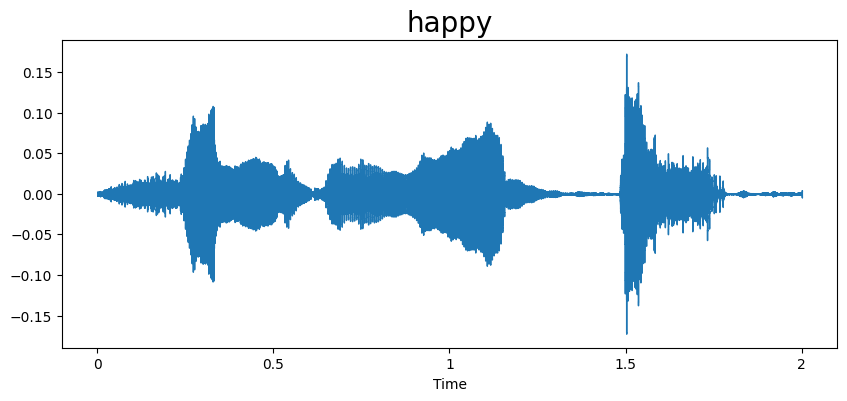

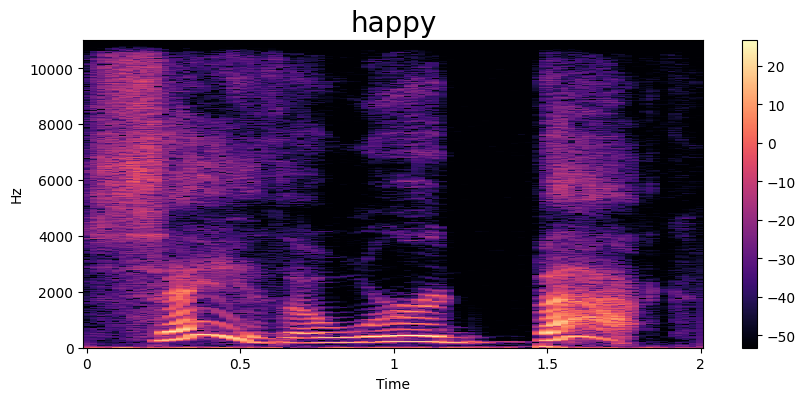

In [14]:
emotion = emot[0]

path = data_df.loc[data_df['Emotions'] == emotion, 'Path'].values[0]
dat, sr = librosa.load(path)

waveplot(dat, sr, emotion)
spectogram(dat, sr, emotion)
Audio(path)

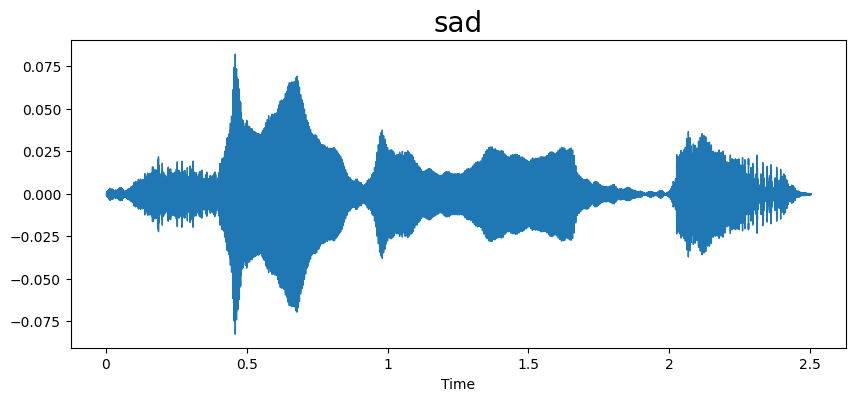

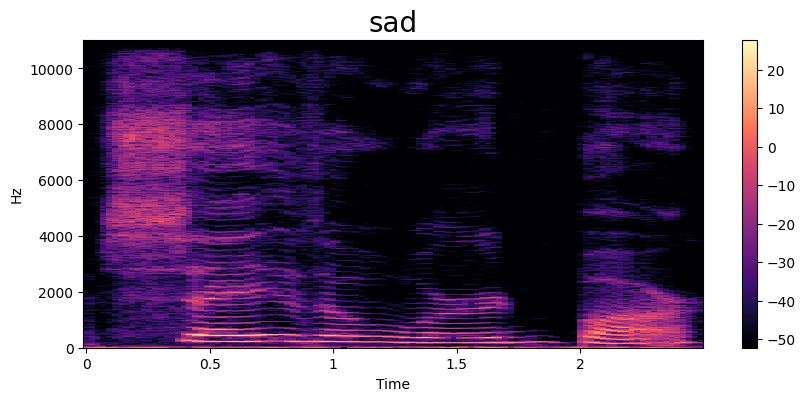

In [15]:
emotion = emot[1]

path = data_df.loc[data_df['Emotions'] == emotion, 'Path'].values[1]
dat, sr = librosa.load(path)

waveplot(dat, sr, emotion)
spectogram(dat, sr, emotion)
Audio(path)

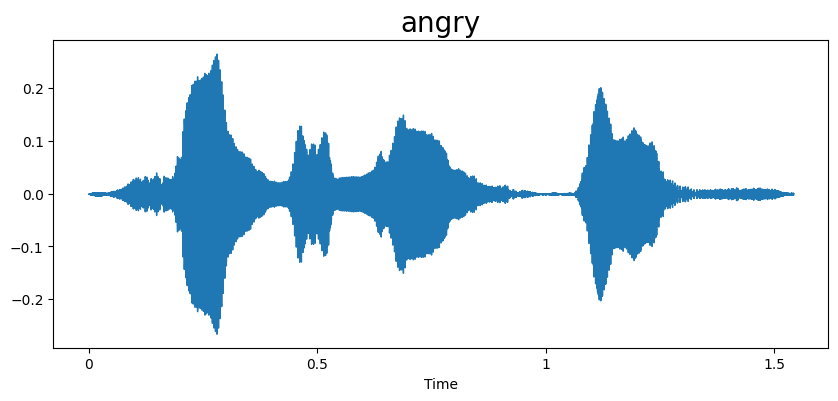

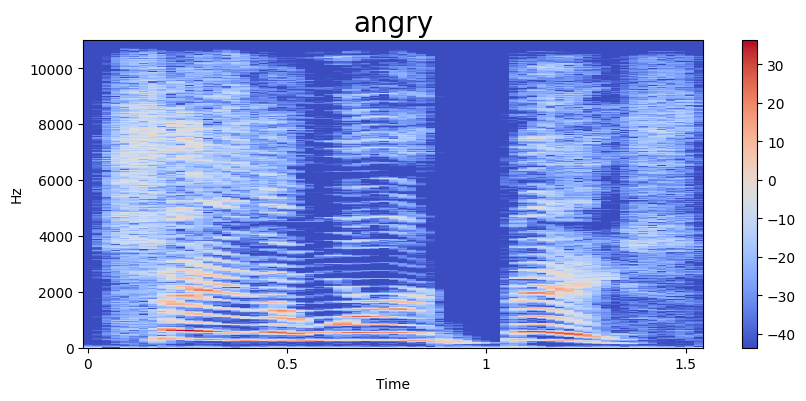

In [16]:
emotion = emot[2]

path = data_df.loc[data_df['Emotions'] == emotion, 'Path'].values[2]
dat, sr = librosa.load(path)

waveplot(dat, sr, emotion)
spectogram(dat, sr, emotion)
Audio(path)

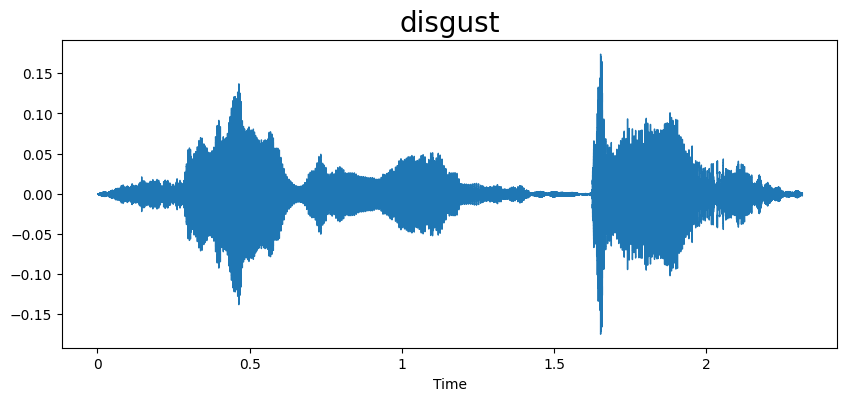

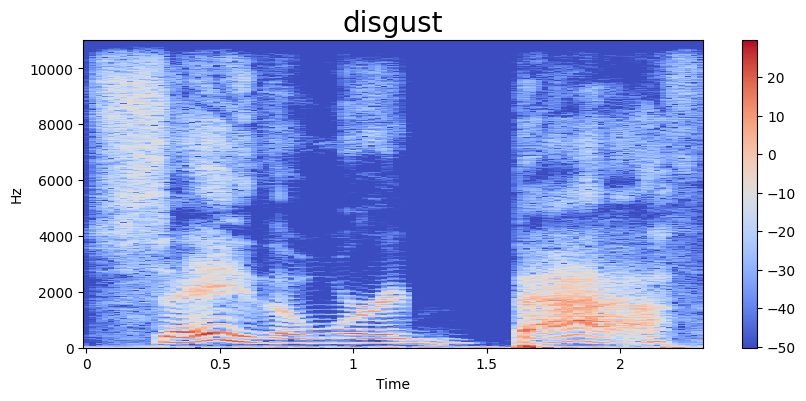

In [17]:
emotion = emot[3]

path = data_df.loc[data_df['Emotions'] == emotion, 'Path'].values[3]
dat, sr = librosa.load(path)

waveplot(dat, sr, emotion)
spectogram(dat, sr, emotion)
Audio(path)

### Data Augmentation

In [19]:
#fungsi menambahkan noise pada data audio
def noise(dat):
  noise_amp = 0.00003 * np.random.uniform() * np.amax(dat)
  dat = dat * noise_amp * np.random.normal(size=dat.shape[0])
  return dat

#fungsi mempercepat atau melambatkan data audio dengan menggunakan time stretching
def stretch(dat):
  return librosa.effects.time_stretch(dat, rate=0.75)

#fungsi menggeser data audio 
#(menggeser elemen-elemen dalam array numpy menggunakan np.roll(). Jumlah geseran acak antara -5 hingga 5 milidetik)
def shift(dat):
  shift_range = int(np.random.uniform(low=-5, high=5)*1000)
  return np.roll(dat, shift_range)

#fungsi mengubah pitch (nada) data audio
def pitch(dat, sr):
  return librosa.effects.pitch_shift(y=dat, sr=sr, n_steps=4)

#ambil beberapa contoh dan mengecek teknis
path = np.array(data_df.Path)[1]
dat, sr = librosa.load(path)

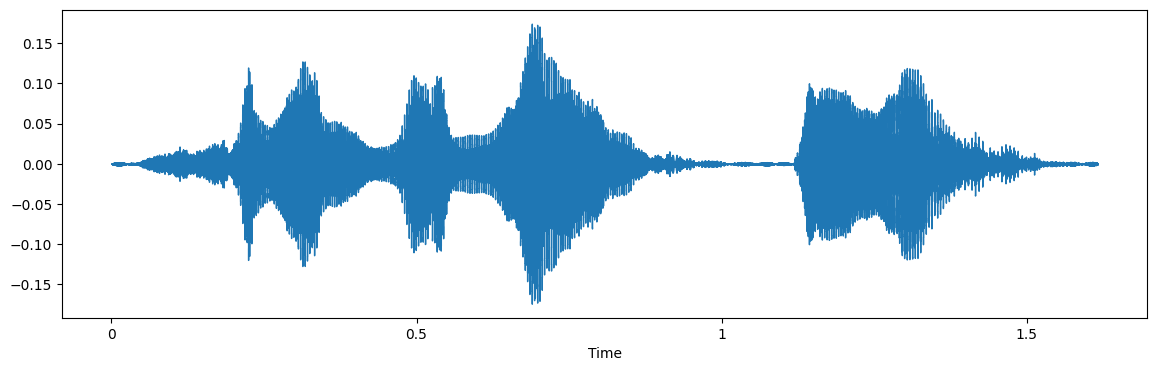

In [20]:
#contoh simple
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=dat, sr=sr)
Audio(path)

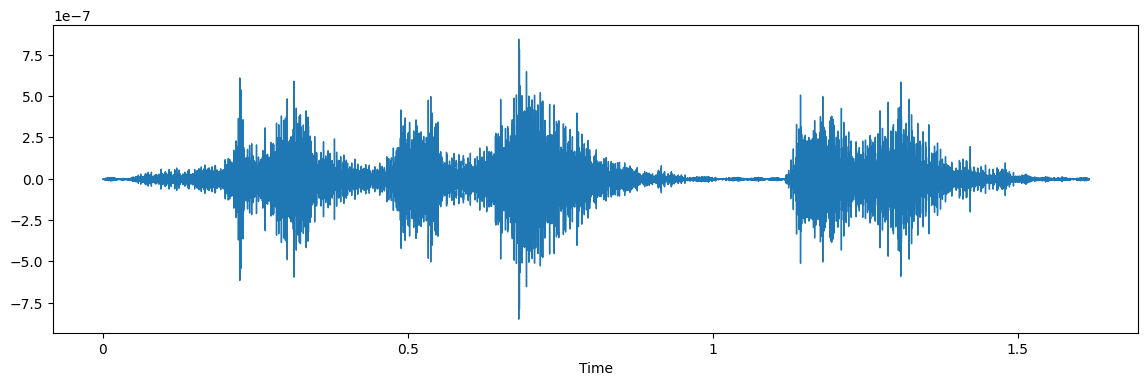

In [21]:
#noise
x=noise(dat)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sr)
Audio(x, rate=sr)

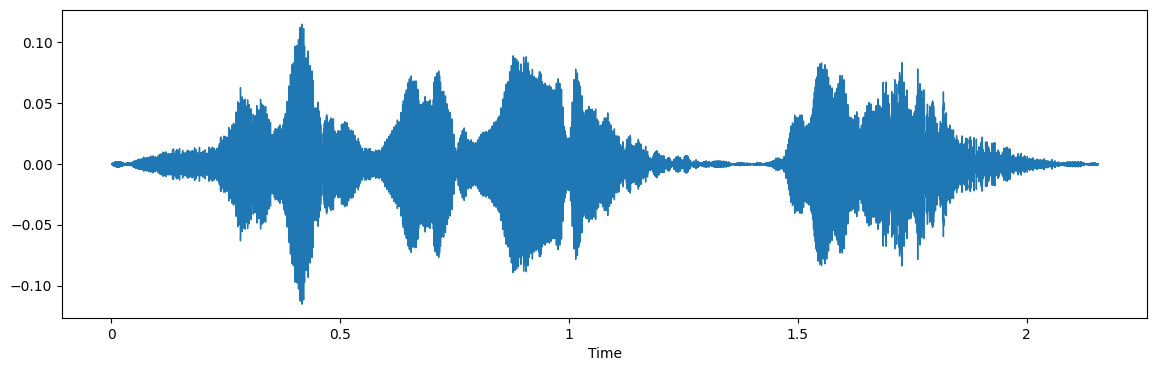

In [22]:
#stretching
x=stretch(dat)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sr)
Audio(x, rate=sr)

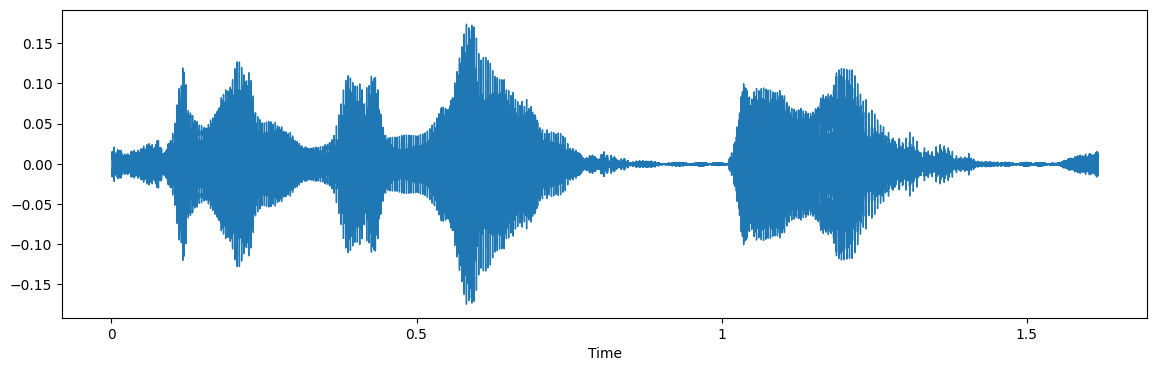

In [23]:
#shifting
x=shift(dat)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sr)
Audio(x, rate=sr)

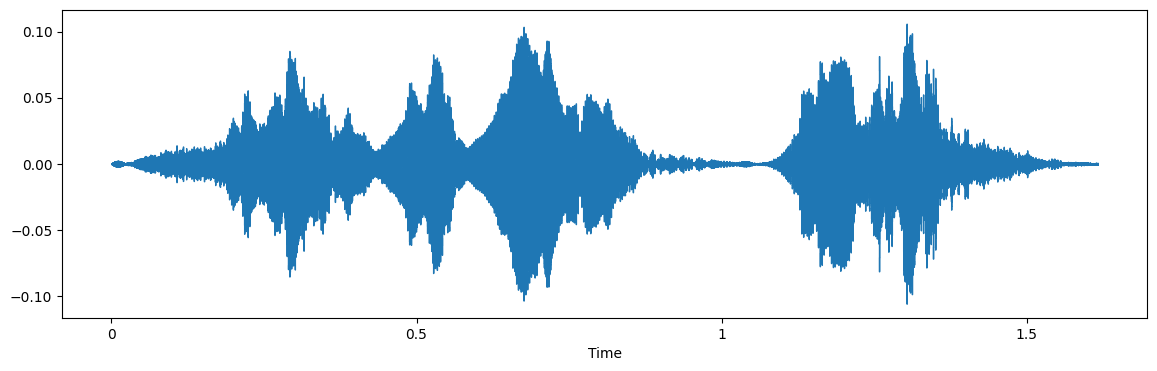

In [24]:
#pitch
#shifting
x=pitch(dat,sr)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sr)
Audio(x, rate=sr)

### Feature Extraction

In [25]:
def extract_features(dat):
  #ZCR
  result = np.array([])
  # zcr = np.mean(librosa.feature.zero_crossing_rate(y=dat).T, axis=0)
  # result = np.hstack((result, zcr)) #stacking horizontally

  # # #chroma_stft
  # stft = np.abs(librosa.stft(dat))
  # chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis=0)
  # result = np.hstack((result, chroma_stft))

  #MFCC
  mfcc = np.mean(librosa.feature.mfcc(y=dat, sr=sr).T, axis=0) 
  result = np.hstack((result, mfcc))

  # root mean square value
  rms = np.mean(librosa.feature.rms(y=dat).T, axis=0) 
  result = np.hstack((result, rms))

  #MelSpectogram
  mel = np.mean(librosa.feature.melspectrogram(y=dat, sr=sr).T, axis=0) 
  result = np.hstack((result, mel))

  return result

def get_features(path):
  dat, sr = librosa.load(path, duration=2.5, offset=0.6)
  
  #tanpa augmentasi
  res1 = extract_features(dat)
  result = np.array(res1)

  #with noise
  # noise_data = noise(dat)
  # res2 = extract_features(noise_data)
  # result = np.vstack((result, res2))

  #stretching &  pitching
  new_data = stretch(dat)
  data_stretch_pitch = pitch(new_data, sr)
  res3 = extract_features(data_stretch_pitch)
  result = np.vstack((result, res3))

  return result

In [38]:
X, Y = [], []

di = zip(data_df['Path'], data_df['Emotions'])
for path, emotion in di :
  try:
    feature = get_features(path)
    for ele in feature :
      X.append(ele)
      Y.append(emotion)
  except:
    print(path)

In [39]:
len(X), len(Y), data_df['Path'].shape

(3200, 3200, (1600,))

In [40]:
new_df = pd.DataFrame(X)
new_df['Emotions'] = Y
new_df.to_csv('dataframe.csv', index=False)
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,Emotions
0,-398.608246,75.117401,-21.772625,-19.993965,2.985435,13.788044,-19.953243,-7.025359,-5.187742,1.833246,...,0.000105,0.000157,0.000185,0.000133,0.000134,0.000070,0.000038,0.000034,6.250596e-06,angry
1,-435.457855,62.784199,-40.289902,-21.640230,12.302940,-11.770700,-24.204956,2.728833,-0.921895,5.386346,...,0.000213,0.000168,0.000206,0.000170,0.000123,0.000041,0.000041,0.000018,2.700353e-06,angry
2,-469.633392,101.032448,1.475380,-32.444489,-9.686409,14.370925,-1.291309,-5.177819,-9.246144,5.867874,...,0.000115,0.000082,0.000030,0.000011,0.000015,0.000021,0.000019,0.000015,9.260864e-07,angry
3,-508.431519,87.727814,-24.071020,-37.488564,7.933214,5.827192,-12.773171,-11.624978,2.075786,-6.380317,...,0.000027,0.000048,0.000152,0.000140,0.000077,0.000029,0.000015,0.000008,8.881065e-07,angry
4,-430.067535,41.362911,0.635097,2.689114,6.689570,4.088405,-14.037337,-5.870035,-9.127225,0.862766,...,0.000358,0.000351,0.000266,0.000088,0.000100,0.000195,0.000147,0.000067,2.281613e-06,angry


### Data Preparation

In [3]:
new_df = pd.read_csv('./dataframe.csv')

In [4]:
new_df

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,Emotions
0,-398.608246,75.117401,-21.772625,-19.993965,2.985435,13.788044,-19.953243,-7.025359,-5.187742,1.833246,...,0.000105,0.000157,0.000185,0.000133,0.000134,0.000070,0.000038,0.000034,6.250596e-06,angry
1,-435.457855,62.784199,-40.289902,-21.640230,12.302940,-11.770700,-24.204956,2.728833,-0.921895,5.386346,...,0.000213,0.000168,0.000206,0.000170,0.000123,0.000041,0.000041,0.000018,2.700353e-06,angry
2,-469.633392,101.032448,1.475380,-32.444489,-9.686409,14.370925,-1.291309,-5.177819,-9.246144,5.867874,...,0.000115,0.000082,0.000030,0.000011,0.000015,0.000021,0.000019,0.000015,9.260864e-07,angry
3,-508.431519,87.727814,-24.071020,-37.488564,7.933214,5.827192,-12.773171,-11.624978,2.075786,-6.380317,...,0.000027,0.000048,0.000152,0.000140,0.000077,0.000029,0.000015,0.000008,8.881065e-07,angry
4,-430.067535,41.362911,0.635097,2.689114,6.689570,4.088405,-14.037337,-5.870035,-9.127225,0.862766,...,0.000358,0.000351,0.000266,0.000088,0.000100,0.000195,0.000147,0.000067,2.281613e-06,angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,-448.833893,83.338745,37.647575,22.228437,-12.170129,11.278098,-11.514675,-0.099687,-6.667456,-12.093400,...,0.000362,0.000455,0.000244,0.000297,0.000448,0.000593,0.001015,0.000759,5.613725e-05,sad
3196,-439.918335,93.449745,28.723021,35.484364,-1.159762,21.052834,-0.996719,-15.050316,1.621255,-3.288582,...,0.000034,0.000035,0.000055,0.000054,0.000070,0.000047,0.000028,0.000013,1.326075e-06,sad
3197,-499.873413,85.335556,29.803734,22.608566,0.690126,14.458855,-21.453918,-0.448134,-3.377415,-10.088739,...,0.000032,0.000017,0.000011,0.000008,0.000011,0.000015,0.000015,0.000006,4.803038e-07,sad
3198,-427.576050,73.257538,33.570995,43.143902,7.047823,13.114096,-0.386601,-11.592039,3.178708,-8.583872,...,0.000148,0.000161,0.000150,0.000181,0.000181,0.000114,0.000093,0.000046,3.928336e-06,sad


In [5]:
X = new_df.iloc[:, :-1].values
Y = new_df['Emotions'].values

In [6]:
Y

array(['angry', 'angry', 'angry', ..., 'sad', 'sad', 'sad'], dtype=object)

In [7]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [27]:
Y[2000]

array([0., 0., 1., 0.])

In [8]:
encoder.categories_[0]

array(['angry', 'disgust', 'happy', 'sad'], dtype=object)

In [9]:
X[1].shape

(149,)

In [10]:
#mensplit data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2560, 149), (2560, 4), (640, 149), (640, 4))

In [11]:
x_train[7]

array([-4.97205383e+02,  4.26953506e+01,  1.13404970e+01,  2.64733486e+01,
       -2.62254601e+01,  5.71237135e+00, -2.29540138e+01, -6.17647982e+00,
       -1.62590265e+00, -1.85202932e+00,  5.72800636e+00, -6.39131737e+00,
       -9.77232218e-01,  1.93542671e+00, -1.21602755e+01,  4.48894787e+00,
       -9.57937431e+00, -2.66812062e+00, -4.98163176e+00, -2.99188066e+00,
        7.08816573e-03,  5.88724215e-04,  5.69793221e-04,  4.32203175e-04,
        5.13638486e-04,  6.14969293e-04,  1.81458751e-03,  7.76010891e-03,
        1.13597913e-02,  8.22639242e-02,  2.98815399e-01,  3.48570496e-01,
        2.93545276e-01,  3.86018939e-02,  7.15073850e-03,  6.12423429e-03,
        5.09691657e-03,  2.76510715e-02,  6.39154837e-02,  1.38056219e-01,
        1.08621262e-01,  3.98177356e-02,  9.49155986e-02,  2.02043965e-01,
        7.39836022e-02,  7.65654296e-02,  6.09396026e-02,  2.57699788e-02,
        3.03587317e-02,  4.52924818e-02,  1.73752457e-02,  8.87995213e-03,
        2.54847272e-03,  

In [35]:
y_train[7]

array([0., 1., 0., 0.])

In [12]:
#scalling data dengan standard scaler sklearn
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2560, 149), (2560, 4), (640, 149), (640, 4))

In [13]:
#buat data kompatible terhadap model
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

In [14]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2560, 149, 1), (2560, 4), (640, 149, 1), (640, 4))

### Membuat Model

In [15]:
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D((1)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Dropout(0.4))
model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 147, 32)           128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 147, 32)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 145, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 145, 64)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 143, 128)          24704     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 143, 128)         0

In [16]:
model_22 = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
40/40 [==============================] - 5s 39ms/step - loss: 1.3003 - accuracy: 0.3305 - val_loss: 1.1376 - val_accuracy: 0.5750
Epoch 2/20
40/40 [==============================] - 1s 34ms/step - loss: 0.9867 - accuracy: 0.6121 - val_loss: 0.6526 - val_accuracy: 0.7500
Epoch 3/20
40/40 [==============================] - 1s 34ms/step - loss: 0.6339 - accuracy: 0.7082 - val_loss: 0.4259 - val_accuracy: 0.7422
Epoch 4/20
40/40 [==============================] - 1s 34ms/step - loss: 0.5033 - accuracy: 0.7406 - val_loss: 0.4052 - val_accuracy: 0.7500
Epoch 5/20
40/40 [==============================] - 1s 34ms/step - loss: 0.4360 - accuracy: 0.7715 - val_loss: 0.3365 - val_accuracy: 0.7766
Epoch 6/20
40/40 [==============================] - 1s 33ms/step - loss: 0.3865 - accuracy: 0.8426 - val_loss: 0.1682 - val_accuracy: 0.9531
Epoch 7/20
40/40 [==============================] - 1s 33ms/step - loss: 0.2372 - accuracy: 0.9250 - val_loss: 0.1247 - val_accuracy: 0.9594
Epoch 8/20
40

In [17]:
num_epochs = 20

20/20 [==============================] - 1s 7ms/step - loss: 0.0736 - accuracy: 0.9812
Testing accuracy of our model:  98.1249988079071 %


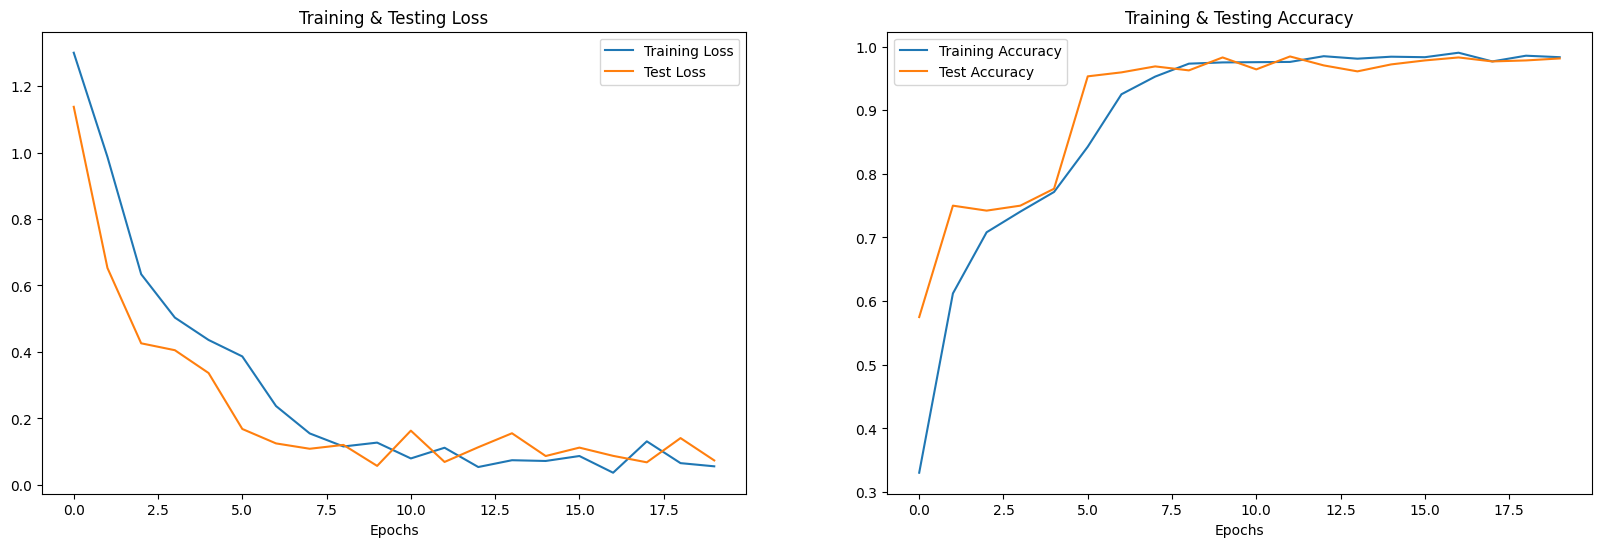

In [18]:
print('Testing accuracy of our model: ', model.evaluate(x_test, y_test)[1]*100, '%')
epochs = [i for i in range(num_epochs)]
fig, ax = plt.subplots(1,2)
train_acc = model_22.history['accuracy']
train_loss = model_22.history['loss']
test_acc = model_22.history['val_accuracy']
test_loss = model_22.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs, train_loss, label='Training Loss')
ax[0].plot(epochs, test_loss, label='Test Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel('Epochs')

ax[1].plot(epochs, train_acc, label='Training Accuracy')
ax[1].plot(epochs, test_acc, label='Test Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epochs')
plt.savefig('./saved_graph/Training and Tesing Loss & Accuracy')
plt.show()



In [20]:
#prediksi di data test
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [21]:
c_df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])

c_df['Predicted Labels'] = y_pred.flatten()
c_df['Actual Labels'] = y_test.flatten()

In [22]:
c_df.sample(10)

,Predicted Labels,Actual Labels
209,sad,sad
24,sad,sad
567,disgust,disgust
181,sad,sad
550,sad,sad
569,angry,angry
10,disgust,disgust
190,angry,angry
376,happy,happy
374,angry,angry


<Axes: xlabel='None', ylabel='None'>

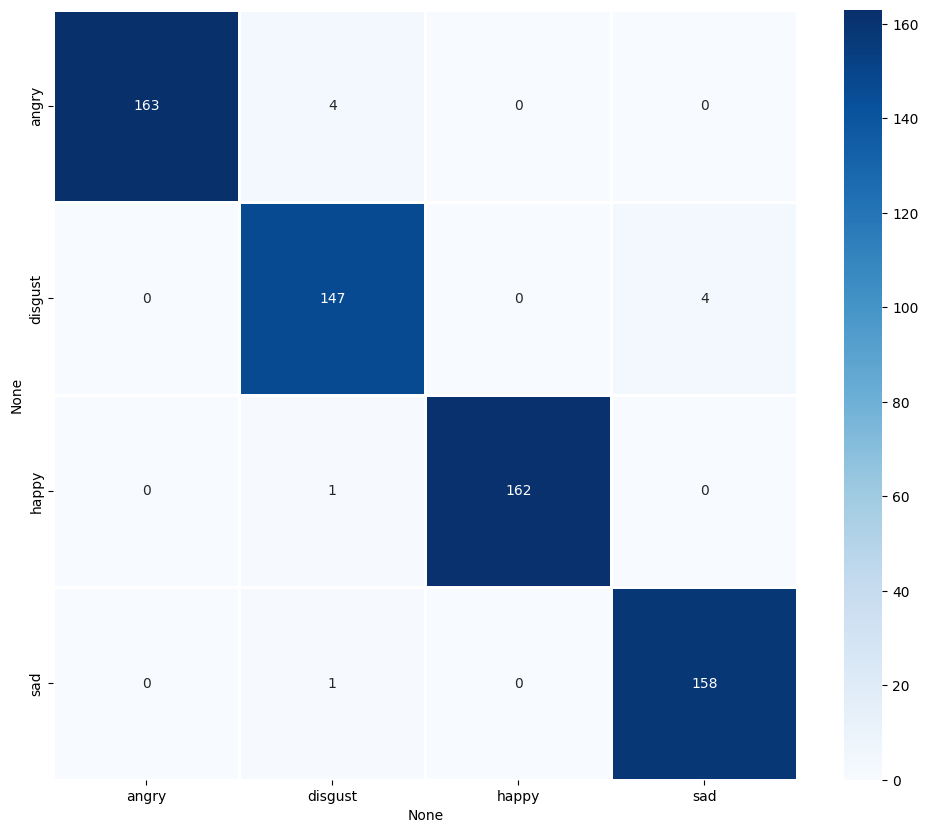

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,10))
cm = pd.DataFrame(cm, index=[i for i in encoder.categories_], columns=[i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')


In [24]:
model.save('./saved_model/Mood.h5')